# Regresión Lineal

## y_1 = a_11 * x_1 + a_12 * x_2 + ... + a_1N * x_N + b_1
## y_2 = a_21 * x_1 + ... + b_2
## y_3 = ...
## ...
## y_M = ...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time


In [2]:

N = 6
M = 2
p = 1000 #Cantidad de instancias del problema

n = np.random.uniform(-1,1,(N+1,M)) # Estos son mis a y mis b

display(n.shape)

x =  np.random.uniform(-9,9,(p,N+1))

display(x.shape)

x[:,-1] = 1 # Defino como 1 toda la ultima columna

z = np.dot(x,n)

print (z.shape)



(7, 2)

(1000, 7)

(1000, 2)


## MODELO

#### Hay dos maneras de frenar el modelo, puedo tomar un error mínimo que cuando lo alcanza frena,
#### o se puede tomar una cantidad de iteraciones.
#### Para entrenarlo vamos a usar el modo batch.


#### lr = learning rate, es cuanto va a aprender en cada paso
#### w es mi matriz de pesos de N+1 x M donde NxM son pesos y N x 1 son bias
#### E es el error inicializado en 1
#### t es el número de iteraciones

## Modelo sin Perceptrón

In [28]:
def reg_lin (x,z,p=10):
    lr = 1e-5/p #Learning rate
    w = np.random.uniform( -0.1, 0.1, (N + 1, M)) #Defino mi matriz w, esto es lo que voy a ENTRENAR

    E, t, e = [1.], 0, 1.


    fig = plt.figure(figsize=(10,10))
    print('lr = %f'%(lr))
    while (e>0.01) and (t<2000):

        y = np.dot(x,w)
        d = z-y 

        dW = lr*np.dot(x.T,d) #delta simplificada
        w += dW

        e = np.mean(np.square(d)) #MSE error cuadrático medio
        E.append(e)
        t +=1
        #print(t,e,lr)
       # if t % 20 == 0:
       #     print(t,e)
       #     print(n-w)
    #plt.xkcd()
    plt.subplot(221)
    plt.plot(E[1:])
    plt.title("Errores vs t")
    plt.subplot(222)
    plt.imshow(w,cmap=plt.get_cmap('RdBu'))
    plt.colorbar()
    plt.title('Matriz W')
    plt.show()
    print('Error: %f - N° de iter: %i'%(e,t))
    xp = np.random.uniform(-25,25,(100,N+1))
    xp[:,-1] = 1
    zp = np.dot(xp,n)
    yp = np.dot(xp,w)
    print('Error del test: %f' %(np.mean(np.square(zp-yp))))


lr = 0.000001


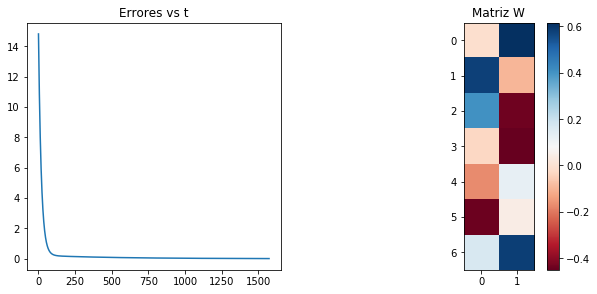

Error: 0.009991 - N° de iter: 1573
Error del test: 0.010333


In [31]:
reg_lin(x,z)

## Perceptrón simple

In [43]:
def reg_lin_perc (x,z,p=10,xkcd = False,M = 2,N=6):
    lr = 1e-4/p #Learning rate
    w = np.random.uniform( -0.1, 0.1, (N + 1, M)) #Defino mi matriz w, esto es lo que voy a ENTRENAR

    E, t, e = [1.], 0, 1.


    fig = plt.figure(figsize=(10,10))
    print('lr = %f'%(lr))
    while (e>0.01) and (t<9000):

        y = np.tanh(np.dot(x,w))
        d = z-y 

        dW = lr*np.dot(x.T,d) #delta simplificada
        w += dW

        e = np.mean(np.square(d)) #MSE error cuadrático medio
        E.append(e)
        t +=1
        #print(t,e,lr)
        if t % 1000 == 0:
            print(t,e)
       #     print(n-w)
    if xkcd == True:
        plt.xkcd()
    plt.subplot(221)
    plt.plot(E[1:])
    plt.title("Errores vs t")
    plt.subplot(222)
    plt.imshow(w,cmap=plt.get_cmap('RdBu'))
    plt.colorbar()
    plt.title('Matriz W')
    plt.show()
    print(e)
    print('n-w = %f'%(np.mean(n-w)))
    
    c = w[0,0]/n[0,0]
    print ('n*c - w = ',(n*c-w))
    
    xp = np.random.uniform(-25,25,(100,N+1))
    xp[:,-1] = 1
    #zp = np.sign(np.dot(xp,n))
    zp = np.sign(np.prod(xp,axis=1)) 
    yp = np.tanh(np.dot(xp,w))
    print (w.shape,xp.shape,zp.shape,yp.shape)
    print('Error: %f'%(np.mean(np.square(zp-yp))))


lr = 0.000010
1000 0.04894829477396419
2000 0.03737985636132617
3000 0.03201828915072884
4000 0.02872271363483488
5000 0.0264138011110912
6000 0.02466985117701749
7000 0.023286795802583443
8000 0.02215177423246433
9000 0.021196391160244653


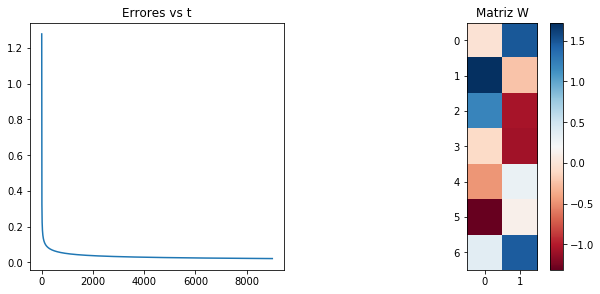

0.021196391160244653
n-w = -0.097829
n*c - w =  [[ 0.00000000e+00  2.46198533e-01]
 [-8.49351141e-02 -3.36476559e-02]
 [-6.30540869e-02 -1.79759342e-01]
 [ 3.61120923e-04 -1.98411036e-01]
 [-3.68320414e-03  5.21324264e-02]
 [ 7.24114550e-02 -3.22347187e-03]
 [ 2.44562943e-01  5.56854244e-01]]
(7, 2) (100, 7) (100,) (100, 2)


ValueError: operands could not be broadcast together with shapes (100,) (100,2) 

In [46]:
z_ = np.sign(z)
reg_lin_perc(x,z_)

lr = 0.000010
1000 0.9860153072033248
2000 0.9860153066116947
3000 0.9860153066116653
4000 0.9860153066116653
5000 0.9860153066116653
6000 0.9860153066116653
7000 0.9860153066116653
8000 0.9860153066116653
9000 0.9860153066116653


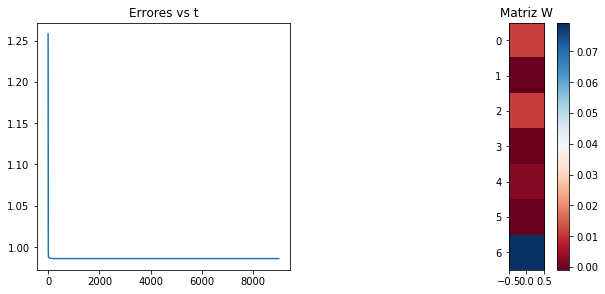

0.9860153066116653
n-w = 0.062698
n*c - w =  [[ 0.         -1.02366734]
 [-0.95432354  0.15636908]
 [-0.68029935  0.70246321]
 [ 0.04753364  0.73981618]
 [ 0.27287579 -0.21088585]
 [ 0.72566555 -0.07324007]
 [-0.43698271 -1.26012164]]
(7, 1) (100, 7) (100,) (100, 1)
Error: 1.069064


In [45]:
z_2 = np.sign(np.prod(x,axis=1)).reshape((p,1))
reg_lin_perc(x,z_2,M = 1)

In [50]:
z_2 = np.sign(np.prod(x,axis=1))
print (z_2.shape)

(1000,)


## Falla porque estoy analizando una categorizacion no linealmente separable

In [82]:
import pandas as pd

df = pd.read_csv('../WebScrap/T.csv',sep = ',')

z= df['0'][:]
x= [1,df['Unnamed: 0'][:]]

N = len(z)
M = len(x)

In [83]:
lr = [1e-5,] #Learning rate
w = np.random.uniform( -0.1, 0.1, (N + 1, M)) #Defino mi matriz w, esto es lo que voy a ENTRENAR

print (w.shape)

E, t, e = [1.], 0, 1.

    
for lr in lr:
    
    fig = plt.figure(figsize=(10,4))
    print(lr)
    while (e>0.01) and (t<900):

        y = np.dot(x,w)
        d = z-y 

        dW = lr*np.dot(x.T,d) #delta simplificada
        w += dW

        e = np.mean(np.square(d)) #MSE error cuadrático medio
        E.append(e)
        t +=1
        #print(t,e,lr)
        if t % 10 == 0:
            print(t,e)
    plt.subplot(121)
    plt.plot(E[1:])
    plt.title("Errores vs t")
    plt.subplot(122)
    plt.imshow(w,cmap=plt.get_cmap('RdBu'))
    plt.colorbar()
    plt.title('Matriz W')
    plt.show()


(699, 2)
1e-05


ValueError: setting an array element with a sequence.

<Figure size 720x288 with 0 Axes>